In [1]:
%matplotlib inline
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 12 23:56:37 2016

@author: tabacof
"""

import pystan
import numpy as np
import bayesian_anova
import matplotlib.pyplot as plt
import seaborn as sns

Using gpu device 1: GeForce GTX 980 (CNMeM is disabled, cuDNN 4007)


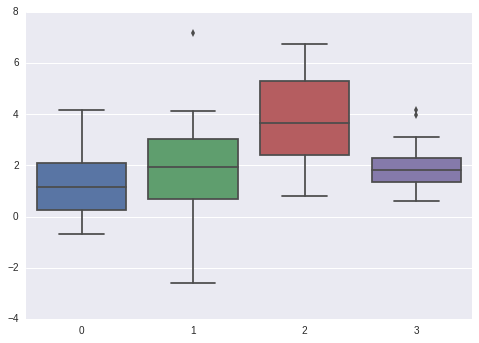

In [8]:
N = 20
K = 4
y = np.random.normal(1.0, size = (N, K))
y[:, 1] *= 2.0
y[:, 2] += 1.0
y[:, 2] *= 2.0
y[:, 3] += 1.0

sns.boxplot(data = y)
plt.show()

In [3]:
data = {
    'K': K,
    'N': N,
    'y': y,
}

fit = pystan.stan(model_code=bayesian_anova.one_way_code, data=data, iter=1000, chains=4)

/home/tabacof/anaconda2/envs/python3/lib/python3.5/multiprocessing/reduction.py:50: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  cls(buf, protocol).dump(obj)
/home/tabacof/anaconda2/envs/python3/lib/python3.5/multiprocessing/reduction.py:50: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  cls(buf, protocol).dump(obj)
/home/tabacof/anaconda2/envs/python3/lib/python3.5/multiprocessing/reduction.py:50: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  cls(buf, protocol).dump(obj)
/home/tabacof/anaconda2/envs/python3/lib/python3.5/multiprocessing/reduction

In [4]:
new_fit = pystan.stan(fit=fit, data=data)

/home/tabacof/anaconda2/envs/python3/lib/python3.5/multiprocessing/reduction.py:50: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  cls(buf, protocol).dump(obj)
/home/tabacof/anaconda2/envs/python3/lib/python3.5/multiprocessing/reduction.py:50: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  cls(buf, protocol).dump(obj)
/home/tabacof/anaconda2/envs/python3/lib/python3.5/multiprocessing/reduction.py:50: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  cls(buf, protocol).dump(obj)
/home/tabacof/anaconda2/envs/python3/lib/python3.5/multiprocessing/reduction

Inference for Stan model: anon_model_1967665b99160b0ba8694ab613d646dd.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

                   mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu                 2.26  4.1e-3   0.18   1.88   2.14   2.26   2.38   2.61   2000    1.0
theta_free[0]     -1.11  6.8e-3    0.3  -1.68  -1.33  -1.12   -0.9  -0.52   2000    1.0
theta_free[1]      -0.6  6.9e-3   0.31  -1.21   -0.8   -0.6   -0.4  -0.01   2000    1.0
theta_free[2]      2.41  7.5e-3   0.34   1.75   2.19   2.42   2.64   3.06   2000    1.0
sigma_likelihood   1.65  3.1e-3   0.14   1.39   1.55   1.64   1.74   1.94   2000    1.0
sigma_theta        3.04    0.05   2.45   0.95   1.62   2.32   3.55    9.6   2000    1.0
theta[0]          -1.11  6.8e-3    0.3  -1.68  -1.33  -1.12   -0.9  -0.52   2000    1.0
theta[1]           -0.6  6.9e-3   0.31  -1.21   -0.8   -0.6   -0.4  -0.01   2000    1.0
theta[2]           2.

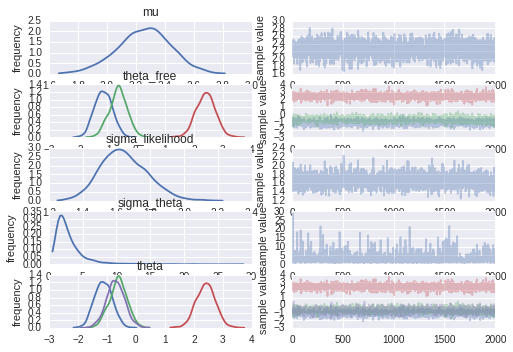

In [5]:
bayesian_anova.show_results(fit)

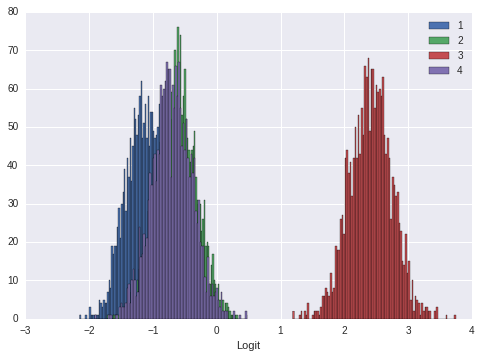

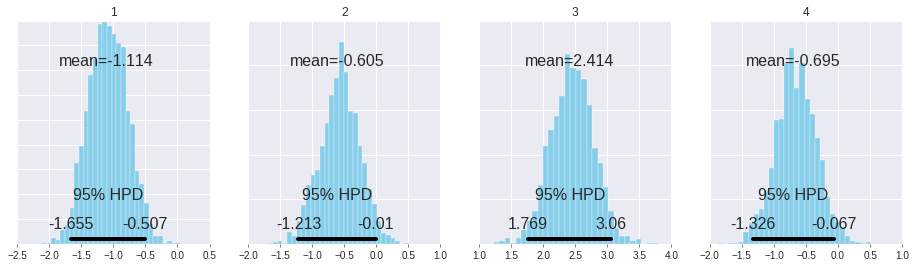

In [6]:
trace = fit.extract()
bayesian_anova.plot_traces([trace['theta'][:,0], trace['theta'][:,1], trace['theta'][:,2], trace['theta'][:,3]], ["1","2","3","4"])

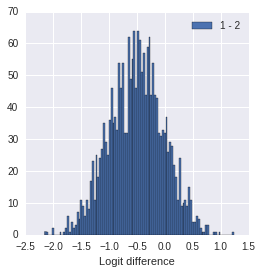

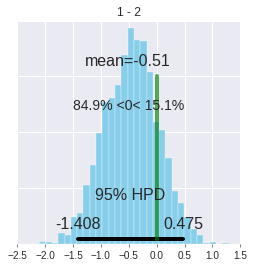

1 - 2 95.0 CI: -1.47006601079 0.437648236318 Pr > 0: 0.151


In [7]:
bayesian_anova.effect_difference(trace['theta'][:,0], trace['theta'][:,1], "1", "2")